# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import logging
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

weather_df = pd.DataFrame({
   "City Name":[],
   "Country":[],
   "Latitude":[],
   "Longitude":[],
   "Date":[],
   "Temperature":[],
   "Humidity":[],
   "Wind Speed":[],
   "Clouds":[]
})
weather_df
#print(query_url)

print("""
                             Beginning Data Retrieval
--------------------------------------------------------------------------------
""")
count = 1


for i in range(len(cities)):
    try:
        query_url = f"{base_url}appid={api_keys.api_key}&q={cities[i]}&units=imperial"
        print(f"Processing Record {count} of Set 1 | {cities[i]}")
        
        response = requests.get(query_url)
        weather_json = response.json()
        
        citycountry = weather_json["sys"]["country"]
        citylat = weather_json["coord"]["lat"]
        citylon = weather_json["coord"]["lon"]
        citydate = time.strftime('%Y-%m-%d', time.localtime(weather_json["dt"]))
        citymaxtmp = weather_json["main"]["temp_max"]
        cityhumid = weather_json["main"]["humidity"]
        citywindspeed = weather_json["wind"]["speed"]
        citycloud = weather_json["clouds"]["all"]

        weather_df = weather_df.append({
            "City Name": cities[i],
            "Country": citycountry,
            "Latitude": citylat,
            "Longitude": citylon,
            "Date": citydate,
            "Temperature": citymaxtmp,
            "Humidity": cityhumid,
            "Wind Speed": citywindspeed,
            "Clouds": citycloud}, ignore_index=True)
        count+=1
    except:
        print("Insufficient data. Skipping..")
print("""
--------------------------------------------------------------------------------
                                Data Retrieval Complete
--------------------------------------------------------------------------------
""")


                             Beginning Data Retrieval
--------------------------------------------------------------------------------

Processing Record 1 of Set 1 | tala
Processing Record 2 of Set 1 | palabuhanratu
Insufficient data. Skipping..
Processing Record 2 of Set 1 | general roca
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | belushya guba
Insufficient data. Skipping..
Processing Record 4 of Set 1 | sitka
Processing Record 5 of Set 1 | kruisfontein
Processing Record 6 of Set 1 | kondinskoye
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | aldan
Processing Record 12 of Set 1 | tabiauea
Insufficient data. Skipping..
Processing Record 12 of Set 1 | touros
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | dingle
Processing Record 15 of Set 1 | keti bandar
Processing Record 16 of Set 1 

Processing Record 168 of Set 1 | jiddah
Insufficient data. Skipping..
Processing Record 168 of Set 1 | liverpool
Processing Record 169 of Set 1 | ancud
Processing Record 170 of Set 1 | cidreira
Processing Record 171 of Set 1 | broome
Processing Record 172 of Set 1 | olinda
Processing Record 173 of Set 1 | sobolevo
Processing Record 174 of Set 1 | camabatela
Processing Record 175 of Set 1 | cartagena
Processing Record 176 of Set 1 | pangnirtung
Processing Record 177 of Set 1 | itarema
Processing Record 178 of Set 1 | airai
Processing Record 179 of Set 1 | avera
Processing Record 180 of Set 1 | yumen
Processing Record 181 of Set 1 | akyab
Insufficient data. Skipping..
Processing Record 181 of Set 1 | torbay
Processing Record 182 of Set 1 | ambilobe
Processing Record 183 of Set 1 | los llanos de aridane
Processing Record 184 of Set 1 | rocha
Processing Record 185 of Set 1 | mildura
Processing Record 186 of Set 1 | kamaishi
Processing Record 187 of Set 1 | guerrero negro
Processing Record 

Processing Record 324 of Set 1 | taoudenni
Processing Record 325 of Set 1 | zaysan
Processing Record 326 of Set 1 | tirat karmel
Processing Record 327 of Set 1 | lucea
Processing Record 328 of Set 1 | sinnai
Processing Record 329 of Set 1 | tabou
Processing Record 330 of Set 1 | phan rang
Insufficient data. Skipping..
Processing Record 330 of Set 1 | atikokan
Processing Record 331 of Set 1 | qafsah
Insufficient data. Skipping..
Processing Record 331 of Set 1 | yanji
Processing Record 332 of Set 1 | chateaubelair
Processing Record 333 of Set 1 | luena
Processing Record 334 of Set 1 | kigonsera
Processing Record 335 of Set 1 | chengdu
Processing Record 336 of Set 1 | timiryazevskiy
Processing Record 337 of Set 1 | deputatskiy
Processing Record 338 of Set 1 | tautira
Processing Record 339 of Set 1 | sakaraha
Processing Record 340 of Set 1 | hasaki
Processing Record 341 of Set 1 | batagay
Processing Record 342 of Set 1 | namibe
Processing Record 343 of Set 1 | brandfort
Processing Record 3

Processing Record 492 of Set 1 | adwa
Processing Record 493 of Set 1 | hualmay
Processing Record 494 of Set 1 | galgani
Insufficient data. Skipping..
Processing Record 494 of Set 1 | arlit
Processing Record 495 of Set 1 | vagur
Processing Record 496 of Set 1 | valdez
Processing Record 497 of Set 1 | poya
Processing Record 498 of Set 1 | delta del tigre
Processing Record 499 of Set 1 | kyabram
Processing Record 500 of Set 1 | chitungwiza
Processing Record 501 of Set 1 | krasnyy chikoy
Processing Record 502 of Set 1 | nuuk
Processing Record 503 of Set 1 | kieta
Processing Record 504 of Set 1 | whitehorse
Processing Record 505 of Set 1 | camacha
Processing Record 506 of Set 1 | panaba
Processing Record 507 of Set 1 | gympie
Processing Record 508 of Set 1 | medicine hat
Processing Record 509 of Set 1 | sweetwater
Processing Record 510 of Set 1 | laminusa
Processing Record 511 of Set 1 | sabang
Processing Record 512 of Set 1 | gladstone
Processing Record 513 of Set 1 | valparaiso
Processing

In [4]:
weather_df

,City Name,Country,Latitude,Longitude,Date,Temperature,Humidity,Wind Speed,Clouds
0,tala,MX,20.65,-103.70,2019-04-09,69.80,13.0,2.39,5.0
1,general roca,AR,-39.03,-67.58,2019-04-09,66.20,55.0,8.05,0.0
2,bambous virieux,MU,-20.34,57.76,2019-04-09,75.20,94.0,8.05,75.0
3,sitka,US,37.17,-99.65,2019-04-09,71.01,51.0,13.00,12.0
4,kruisfontein,ZA,-34.00,24.73,2019-04-09,63.15,81.0,12.35,36.0
5,kondinskoye,RU,59.65,67.41,2019-04-09,31.11,75.0,3.96,20.0
6,yellowknife,CA,62.45,-114.38,2019-04-09,39.20,69.0,5.82,20.0
7,bethel,US,60.79,-161.76,2019-04-09,37.40,51.0,9.17,75.0
8,vaini,IN,15.34,74.49,2019-04-09,78.80,61.0,3.36,0.0
9,souillac,FR,45.60,-0.60,2019-04-09,44.01,93.0,4.18,0.0


In [ ]:
weather_df.describe()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df.to_csv(r'cities.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

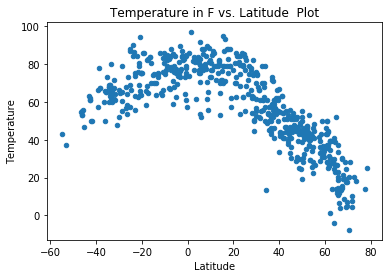

In [17]:
lat_tmp_plt = weather_df.plot.scatter(x='Latitude', y='Temperature', title='Temperature in F vs. Latitude  Plot')

plt.savefig('Images/Temperature vs Latitude.png')
plt.show(lat_tmp_plt)

#### Latitude vs. Humidity Plot

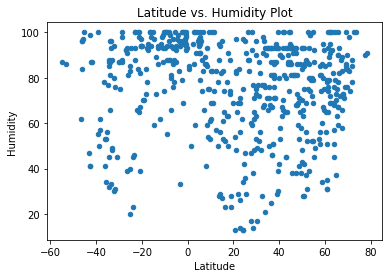

In [18]:
lat_hum_plt = weather_df.plot.scatter(x='Latitude', y='Humidity', title="Latitude vs. Humidity Plot")
plt.savefig('Images/Latitude vs. Humidity.png')
plt.show(lat_hum_plt)

#### Latitude vs. Cloudiness Plot

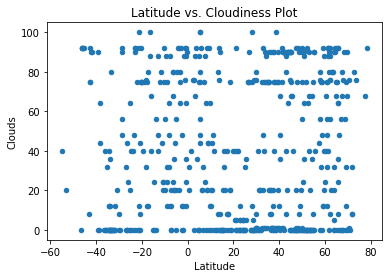

In [19]:
lat_cld_plt = weather_df.plot.scatter(x='Latitude', y='Clouds', title='Latitude vs. Cloudiness Plot')
plt.savefig('Images/Latitude vs. Cloudiness.png')
plt.show(lat_cld_plt)

#### Latitude vs. Wind Speed Plot

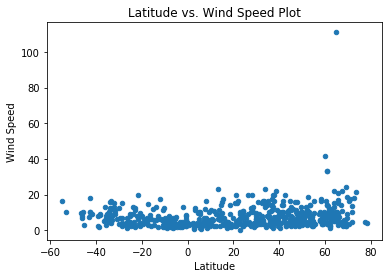

In [20]:
lat_wspeed_plt = weather_df.plot.scatter(x='Latitude', y='Wind Speed', title='Latitude vs. Wind Speed Plot')
plt.savefig('Images/Latitude vs. Wind Speed.png')
plt.show(lat_wspeed_plt)